In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import missingno as msno
from matplotlib import rcParams
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_Retail = pd.read_csv('/content/gdrive/MyDrive/Dibimbing.id DS 11/Muhammad Fakhrul Mukmin - Final Project/data.csv', delimiter =',', encoding = "ISO-8859-1")
df_Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# **Data Overview**

In [ ]:
df_Retail.shape

(541909, 8)

In [ ]:
df_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **Data Cleaning**

In [ ]:
df_Retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df_Retail[df_Retail.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
df_Retail["Description"].fillna("None").head()

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
Name: Description, dtype: object

In [ ]:
df_Retail.dropna(inplace =True)

In [ ]:
df_Retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df_Retail.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [ ]:
df_Retail.describe(exclude=['float64','int64']).T

,count,unique,top,freq
InvoiceNo,406829,22190,576339,542
StockCode,406829,3684,85123A,2077
Description,406829,3896,WHITE HANGING HEART T-LIGHT HOLDER,2070
InvoiceDate,406829,20460,11/14/2011 15:27,543
Country,406829,37,United Kingdom,361878


In [ ]:
df_Retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


Quantity and UnitPrice should only have positive values, but at the minimum there are negative values that must be removed

In [ ]:
df_Retail.drop(df_Retail[df_Retail['Quantity'] < 0].index, inplace = True)
df_Retail.drop(df_Retail[df_Retail['UnitPrice'] < 0].index, inplace = True)

In [ ]:
df_Retail[df_Retail['Quantity']<0].shape[0], df_Retail[df_Retail['UnitPrice']<0].shape[0] 

(0, 0)

In [ ]:
df_Retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.4+ MB


there are 25% of data that has a missing value, and has been deleted

# **Exploratory Data analysis**

In [ ]:
orders_by_country=df_Retail.groupby("Country")["InvoiceNo"].count().sort_values(ascending=False)
orders_by_country.tail()

Country
Lithuania         35
Brazil            32
Czech Republic    25
Bahrain           17
Saudi Arabia       9
Name: InvoiceNo, dtype: int64

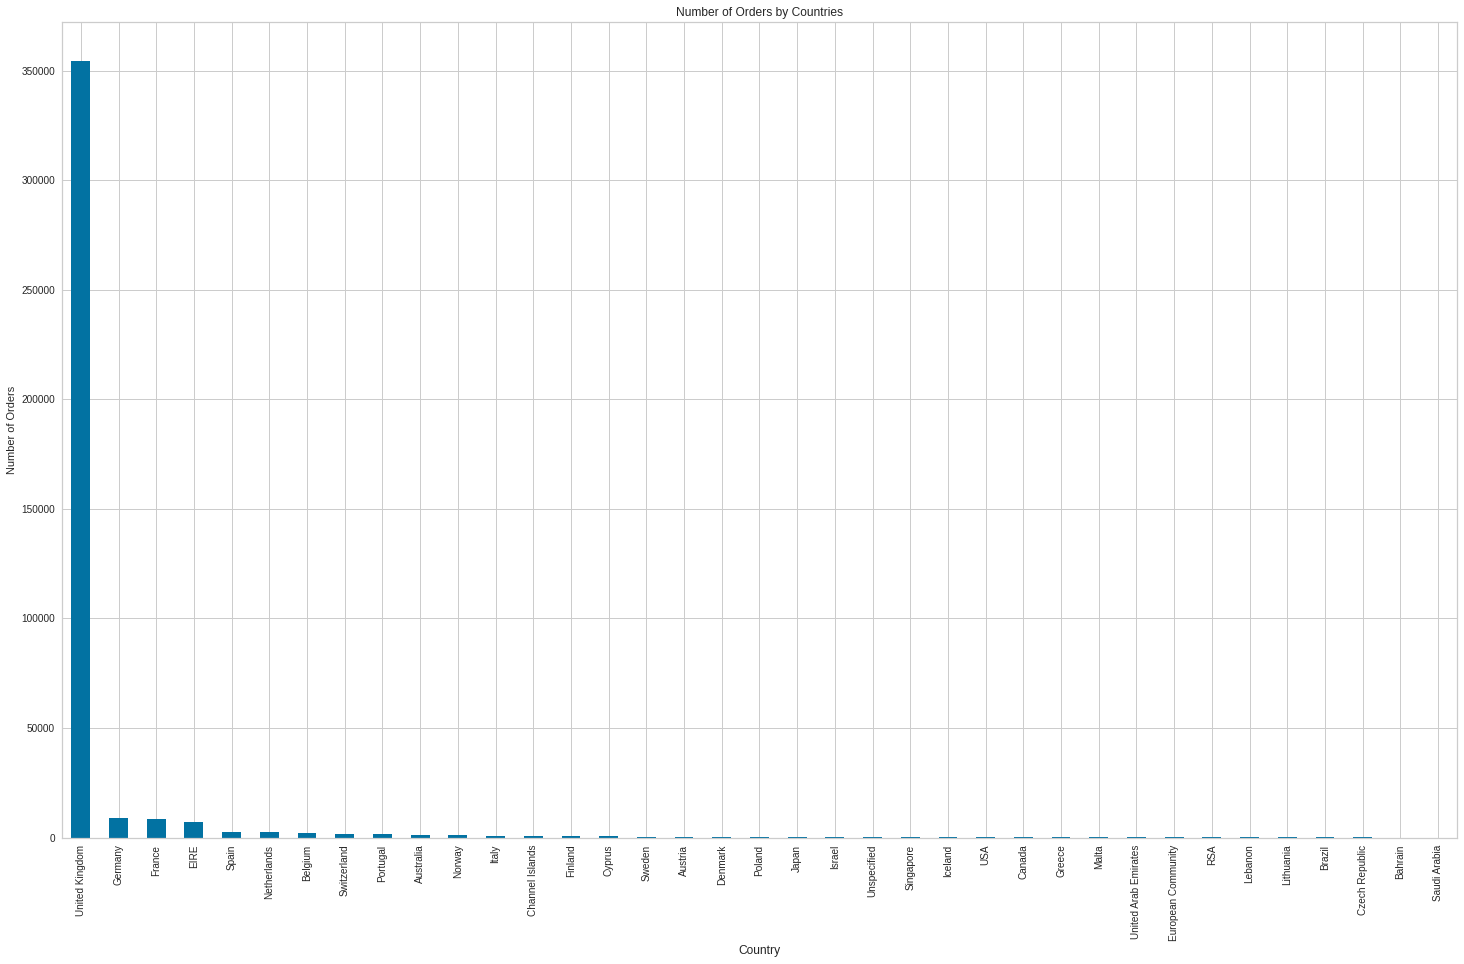

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(25,15))
orders_by_country.plot(kind='bar')
plt.xlabel('Country',fontsize=12)
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Countries')
plt.show()

In [ ]:
df_Retail.groupby("Country").sum()["Quantity"].sort_values(ascending=False)

Country
United Kingdom          4269472
Netherlands              200937
EIRE                     140525
Germany                  119263
France                   111472
Australia                 84209
Sweden                    36083
Switzerland               30083
Spain                     27951
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16122
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Israel                     4046
Poland                     3684
Canada                     2763
Iceland                    2458
USA                        2458
Unspecified                1789
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671
Lithuania                   652


UK has the biggest buyer with a total amount of 4269472

In [ ]:
df_Retail['Quantity'].sum()

5181696

In [ ]:
df_Retail["AmountSpent"]=df_Retail['Quantity'] * df_Retail['UnitPrice']
df_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df_Retail.groupby("Country").sum()["AmountSpent"].sort_values(ascending=False)

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

UK has the highest Amount Spent with a total amount of 7308391.554

In [ ]:
df_Retail["AmountSpent"].describe()

count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: AmountSpent, dtype: float64

# **RFM**

In [ ]:
#Monetary
df_Retail['TotalAmount']= df_Retail['Quantity']*df_Retail['UnitPrice']
df_tm=df_Retail.groupby('CustomerID')['TotalAmount'].sum().reset_index()
df_tm

,CustomerID,TotalAmount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [ ]:
df_nt=df_Retail.groupby('CustomerID')['InvoiceNo'].count().reset_index()
df_nt

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [ ]:
#Recency
df_Retail['InvoiceDate'] = pd.to_datetime(df_Retail['InvoiceDate'])
df_Retail['Last_transaction']=(df_Retail['InvoiceDate'].max()-df_Retail['InvoiceDate']).dt.days
df_lt = df_Retail.groupby(['CustomerID','Country'])['Last_transaction'].max().reset_index()
df_lt

,CustomerID,Country,Last_transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


In [ ]:
#InvoiceNo = Frequency
merge1= pd.merge(df_lt, df_nt, how='inner', on='CustomerID')
df_rfm=pd.merge(merge1,df_tm,how='inner',on= 'CustomerID')
df_rfm

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


**df_rfm Cleansing & Visualization**

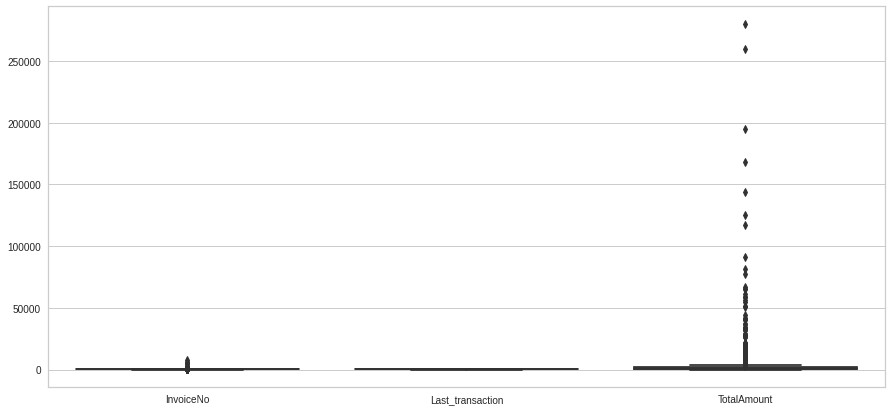

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df_rfm[['InvoiceNo','Last_transaction','TotalAmount']])
plt.show()

In [ ]:
IQR= df_rfm['TotalAmount'].quantile(0.75)-df_rfm['TotalAmount'].quantile(0.25)
lower_limit= df_rfm['TotalAmount'].quantile(0.25) - 1.5*IQR
upper_limit=df_rfm['TotalAmount'].quantile(0.75) + 1.5*IQR
k=df_rfm[df_rfm['TotalAmount']>upper_limit]
m=df_rfm[df_rfm['TotalAmount']<lower_limit]
df_iqr=df_rfm[(df_rfm['TotalAmount']<upper_limit) & (df_rfm['TotalAmount']>lower_limit)]
print('Data shape before removing outlier',df_rfm.shape)
print('Data shape after removing outlier',df_iqr.shape)
print('Total number of outlier:',len(k)+len(m))

Data shape before removing outlier (4347, 5)
Data shape after removing outlier (3923, 5)
Total number of outlier: 424


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


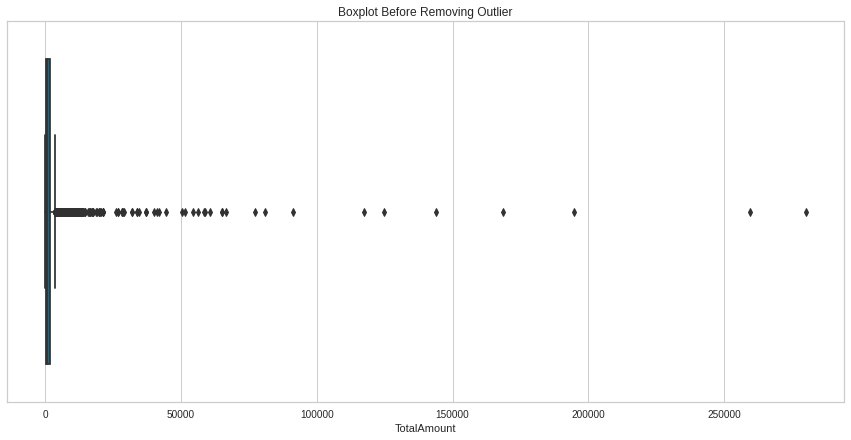

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


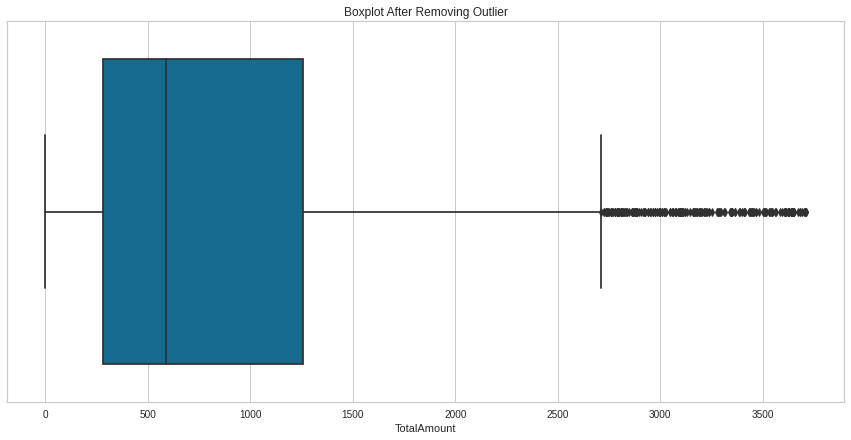

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(df_rfm['TotalAmount'])
plt.title('Boxplot Before Removing Outlier')
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(df_iqr['TotalAmount'])
plt.title('Boxplot After Removing Outlier')
plt.show()

In [ ]:
df_iqr.reset_index(drop=True, inplace= True)
df_iqr

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280.0,United Kingdom,277,10,180.60
3919,18281.0,United Kingdom,180,7,80.82
3920,18282.0,United Kingdom,125,12,178.05
3921,18283.0,United Kingdom,336,756,2094.88


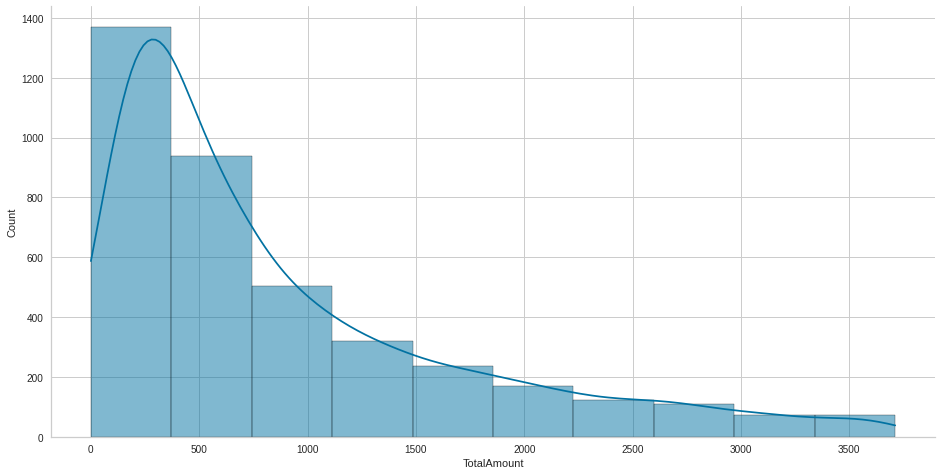

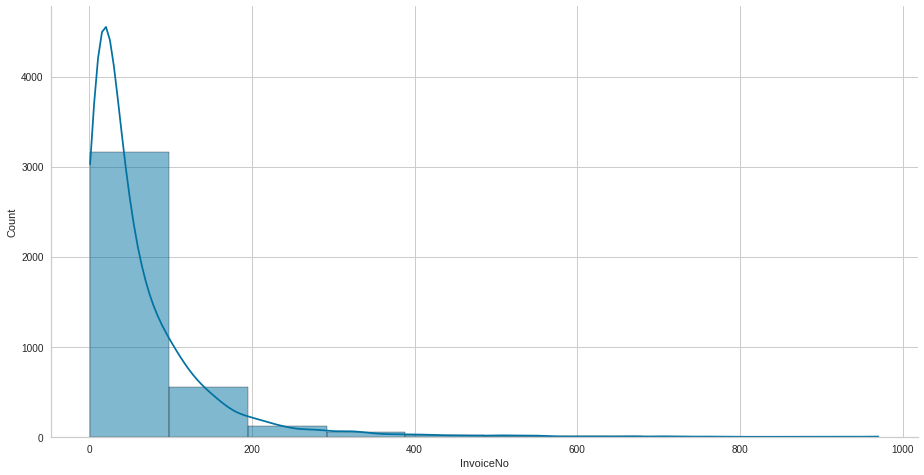

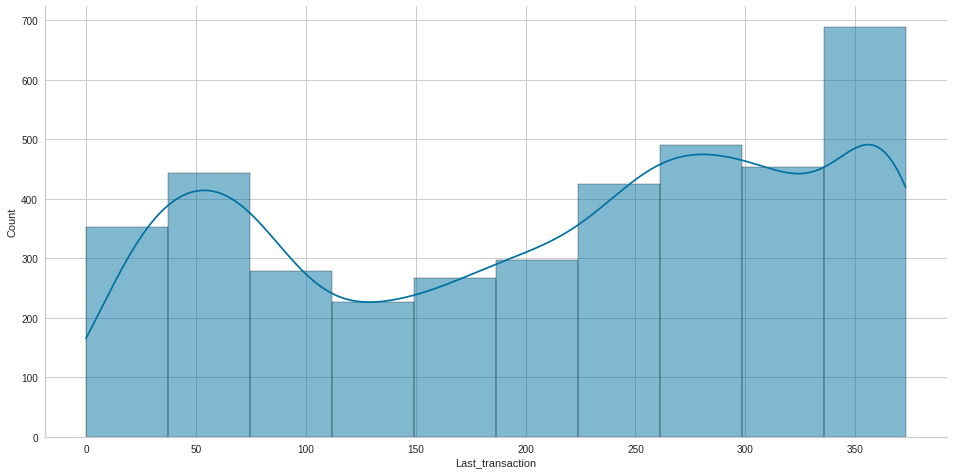

In [ ]:
df_try1=df_iqr.copy()
df_num=['TotalAmount','InvoiceNo','Last_transaction']
for i in df_num:
    sns.displot(df_try1[i],bins=10,kde=True)
    plt.gcf().set_size_inches(15, 7)
    plt.show()

1. histogram are right-skewed for Total Amount (Monetary) and InvoiceNo (Frequency)

2. histogram is bimodal for Last_Transaction (Recency)

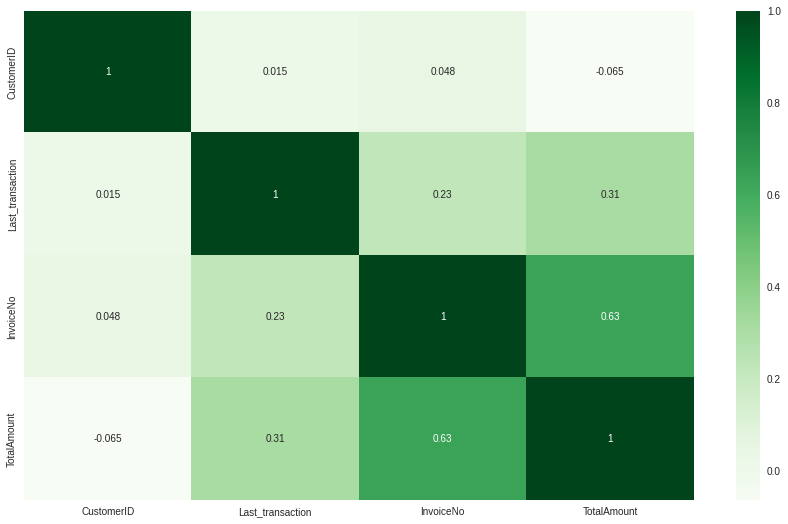

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(df_try1.corr(),cmap="Greens", annot=True)
plt.show()

 Total Amount and InvoiceNo is correlated positively

**next is scalling the numerical data**

The scaling is used for making data points generalized so that the distance between them will be lower.

The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization.

Normalization scales each input variable separately to the range 0-1
Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one

In [ ]:
df_try2=df_try1[['Last_transaction','InvoiceNo','TotalAmount']]
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_try2)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns=['Last_transaction','InvoiceNo','TotalAmount']
df_scaled['Country']=df_try1['Country']
df_scaled

,Last_transaction,InvoiceNo,TotalAmount,Country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


# **CLUSTERING : K-MEANS**

In [ ]:
df_clustering=df_scaled.drop(columns=['Country'],axis=1)
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

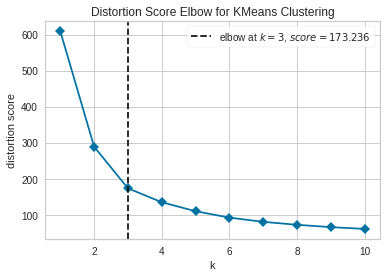

In [ ]:
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_clustering)       
visualizer.show()  

In [ ]:
df_clustering=df_scaled.drop(columns=['Country'],axis=1)
df_clustering

,Last_transaction,InvoiceNo,TotalAmount
0,0.957105,0.030960,0.484200
1,0.048257,0.074303,0.473507
2,0.828418,0.016512,0.090092
3,0.793566,0.086687,0.675160
4,0.544236,0.003096,0.023978
...,...,...,...
3918,0.742627,0.009288,0.048656
3919,0.482574,0.006192,0.021774
3920,0.335121,0.011352,0.047969
3921,0.900804,0.779154,0.564388


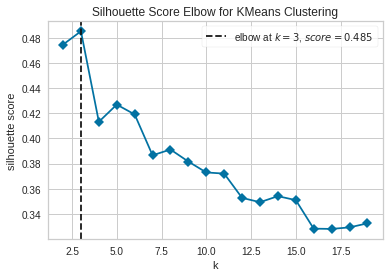

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= False)
visualizer.fit(df_clustering)       
visualizer.show()        

decided from Elbow Method and Silhouette Method the clusters for the data are 3. 

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_clustering)
df_clustering['clusters']= y_predicted
df_clustering

,Last_transaction,InvoiceNo,TotalAmount,clusters
0,0.957105,0.030960,0.484200,0
1,0.048257,0.074303,0.473507,1
2,0.828418,0.016512,0.090092,2
3,0.793566,0.086687,0.675160,0
4,0.544236,0.003096,0.023978,2
...,...,...,...,...
3918,0.742627,0.009288,0.048656,2
3919,0.482574,0.006192,0.021774,1
3920,0.335121,0.011352,0.047969,1
3921,0.900804,0.779154,0.564388,0


In [ ]:
km.cluster_centers_

array([[0.79796367, 0.15825709, 0.63324065],
       [0.22058455, 0.04002649, 0.14850462],
       [0.77648712, 0.04270471, 0.15749711]])

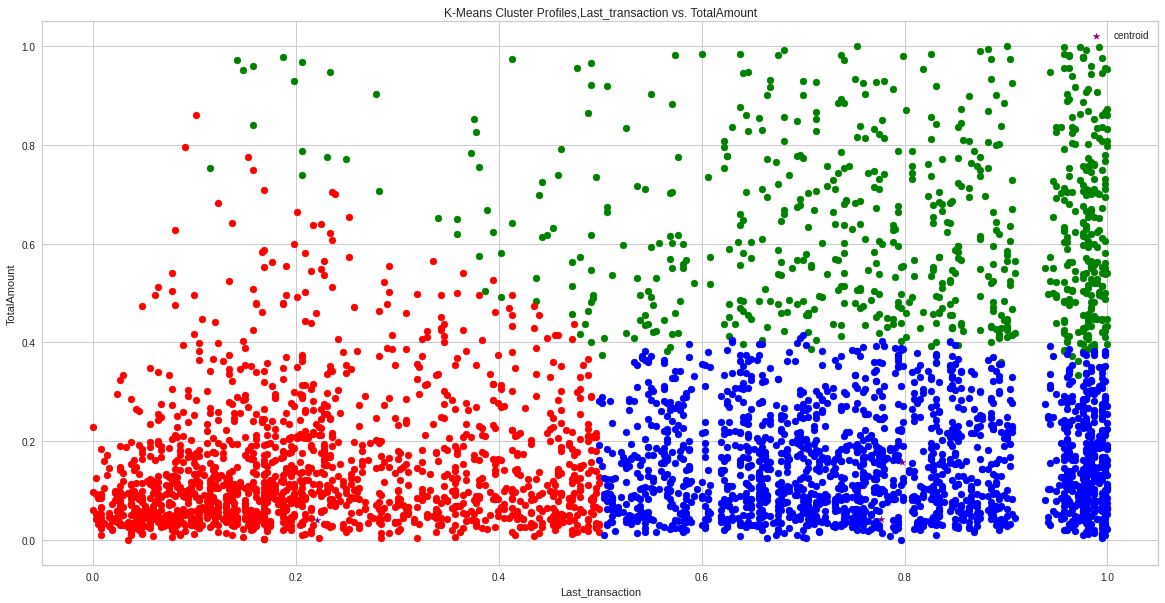

In [ ]:
#Scaled Data
df1 = df_clustering[df_clustering.clusters==0]
df2 = df_clustering[df_clustering.clusters==1]
df3 = df_clustering[df_clustering.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.scatter(df3.Last_transaction,df3['TotalAmount'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

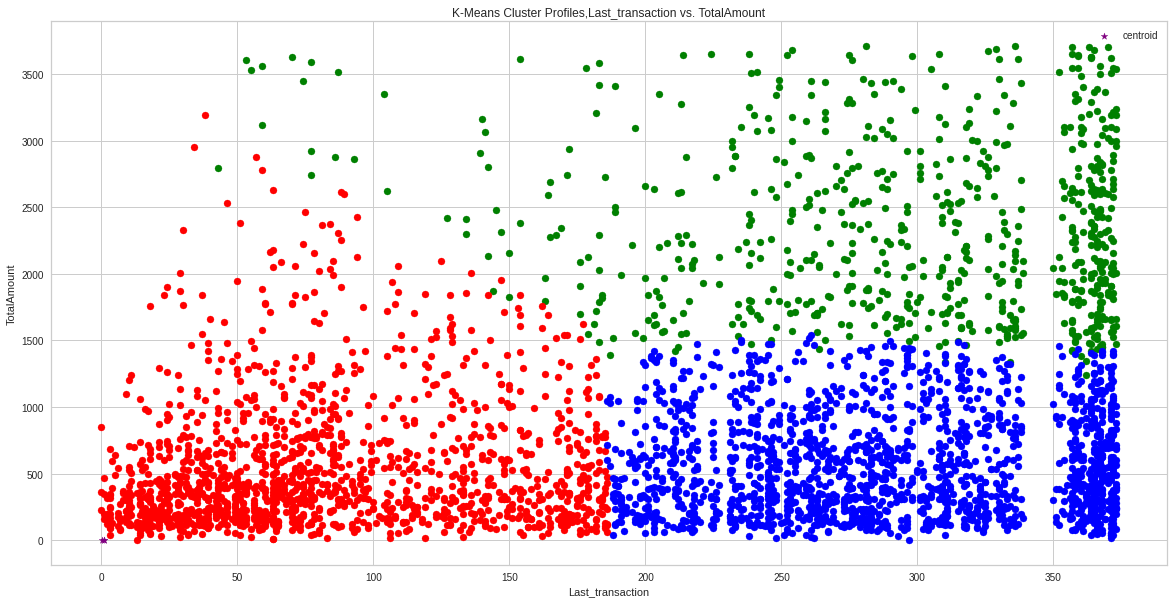

In [ ]:
#Original Data
df_try2['clusters']= y_predicted
df1 = df_try2[df_try2.clusters==0]
df2 = df_try2[df_try2.clusters==1]
df3 = df_try2[df_try2.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.scatter(df3.Last_transaction,df3['TotalAmount'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

**The three clusters based on customer's Recency(Last_transaction) and Monetary(TotalAmount):**

1. customers with the last_transaction between 0 and 180 days, and total amount spent between 0 to $2500;

2. customers with the last_transaction between 180 and 400 days, and total amount spent between 0 and $1500;

3. custoemrs with the last_transaction between 50 and 400 days, and total amount spent between  1500 and 3500.

**Hierarchical Agglomerative Clustering**

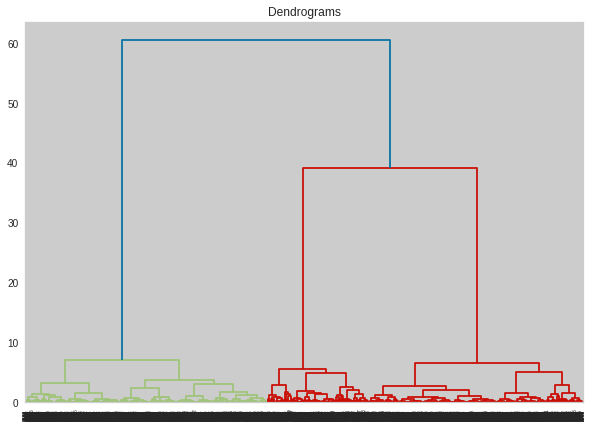

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_clustering, method='ward'))

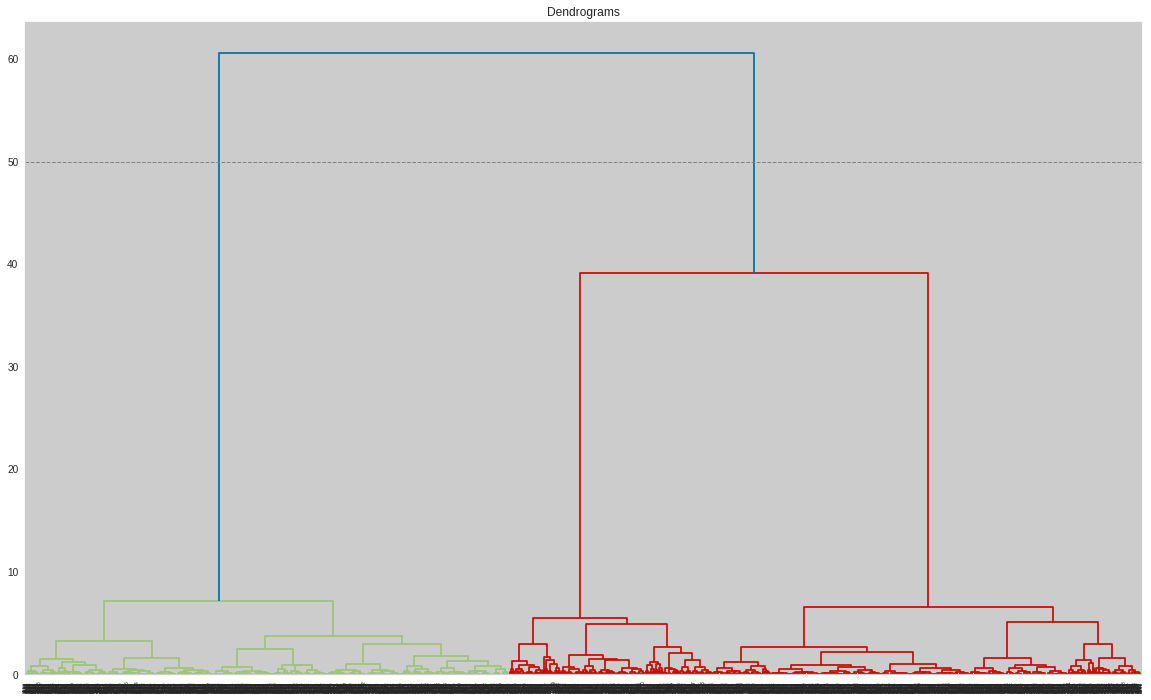

In [ ]:
plt.figure(figsize=(20, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_clustering, method='ward'))
plt.axhline(y=50, c='grey', lw=1, linestyle='dashed')
plt.show()

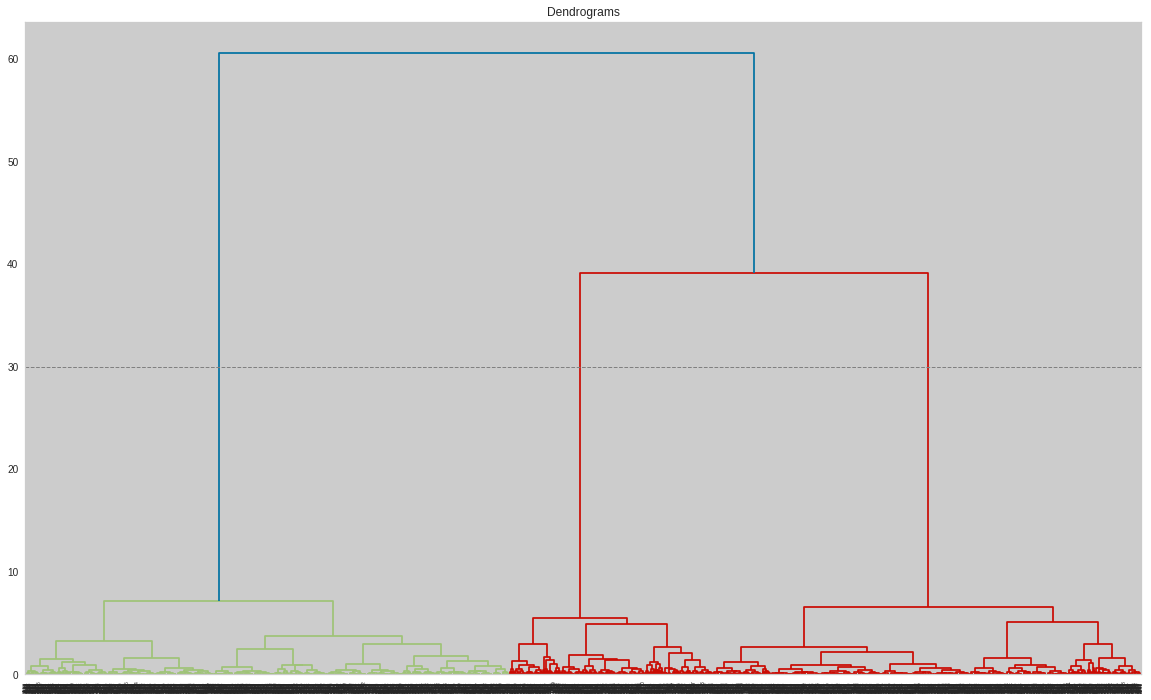

In [ ]:
plt.figure(figsize=(20, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_clustering, method='ward'))
plt.axhline(y=30, c='grey', lw=1, linestyle='dashed')
plt.show()

Next I will visualize with 2 and 3 cluster respectively and try to bring some insights.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster_new = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
two_clusters=cluster_new.fit_predict(df_clustering)

cluster_new = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
three_clusters=cluster_new.fit_predict(df_clustering)

df_clustering['two_clusters'] = two_clusters
df_clustering['three_clusters']= three_clusters
df_clustering

,Last_transaction,InvoiceNo,TotalAmount,clusters,two_clusters,three_clusters
0,0.957105,0.030960,0.484200,0,0,2
1,0.048257,0.074303,0.473507,1,0,1
2,0.828418,0.016512,0.090092,2,1,0
3,0.793566,0.086687,0.675160,0,0,2
4,0.544236,0.003096,0.023978,2,1,0
...,...,...,...,...,...,...
3918,0.742627,0.009288,0.048656,2,1,0
3919,0.482574,0.006192,0.021774,1,0,1
3920,0.335121,0.011352,0.047969,1,0,1
3921,0.900804,0.779154,0.564388,0,0,2


No handles with labels found to put in legend.


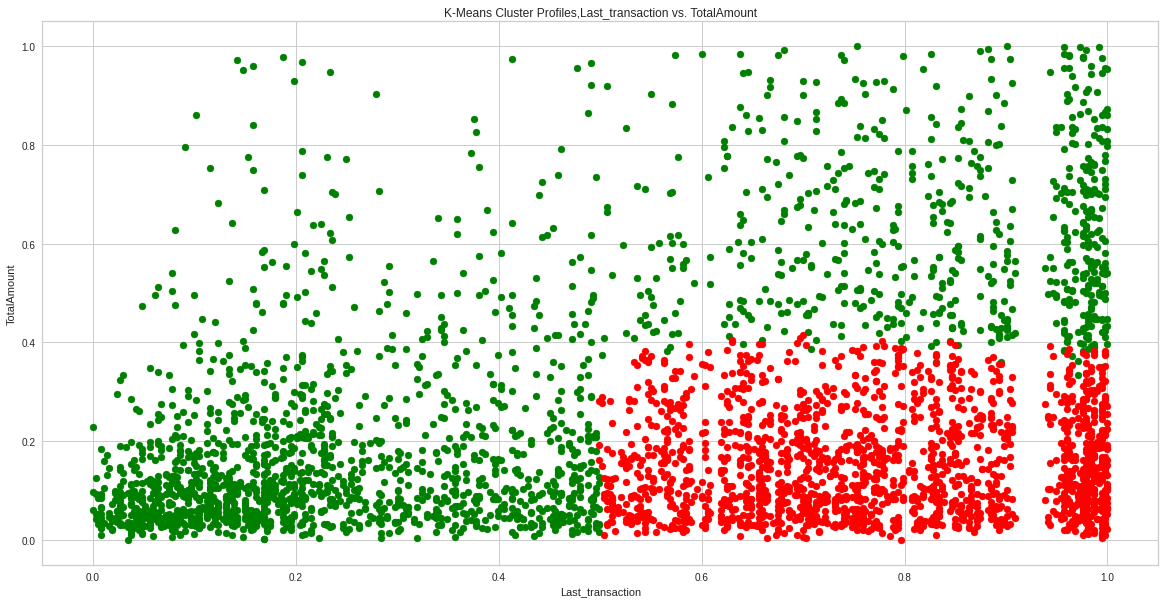

In [ ]:
#visualize using scalling data for 2 cluster
df1 = df_clustering[df_clustering.two_clusters==0]
df2 = df_clustering[df_clustering.two_clusters==1]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Text(0.5, 0.92, 'K Means')

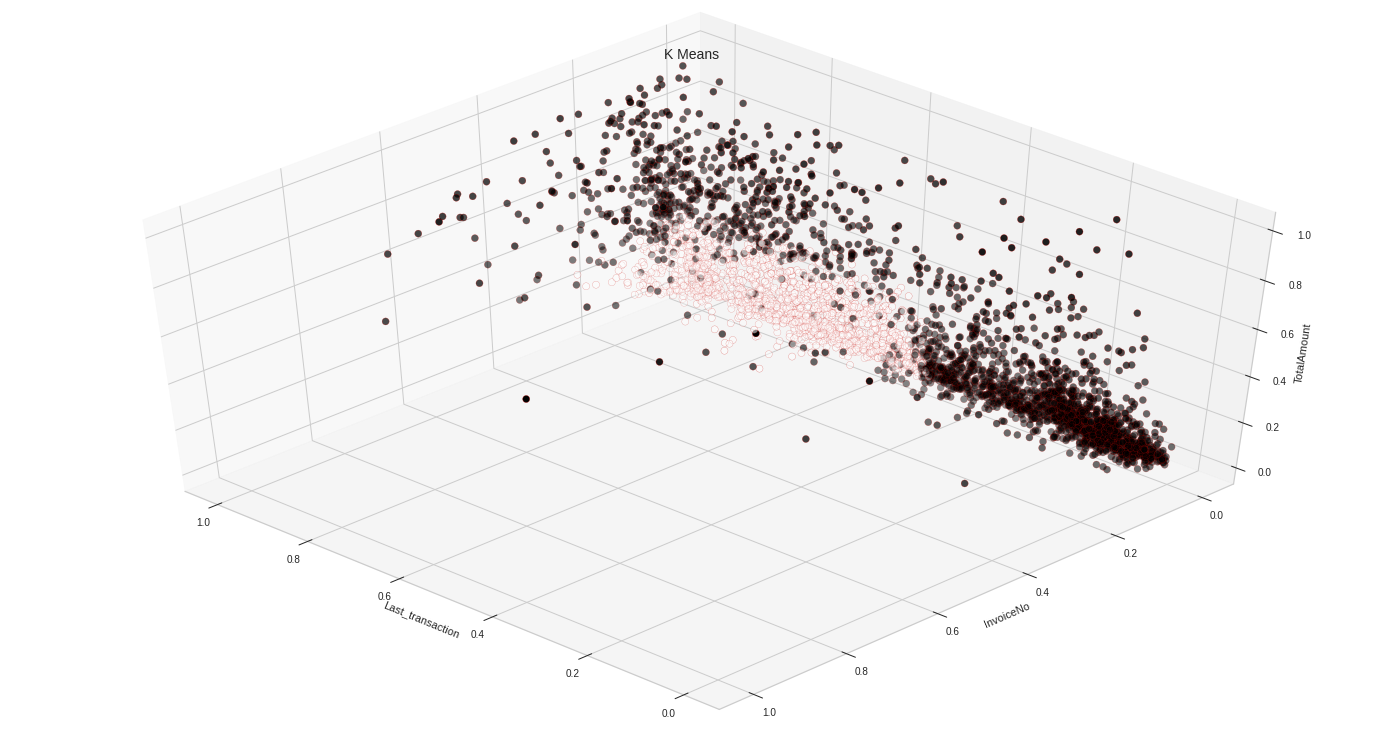

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets


km = KMeans(n_clusters=2)
km.fit(df_clustering)
km.predict(df_clustering)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df_clustering['Last_transaction'], 
           df_clustering['InvoiceNo'], 
           df_clustering['TotalAmount'],
          c=labels.astype(np.float), 
           edgecolor="r", s=50)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("TotalAmount")
plt.title("K Means", fontsize=14)

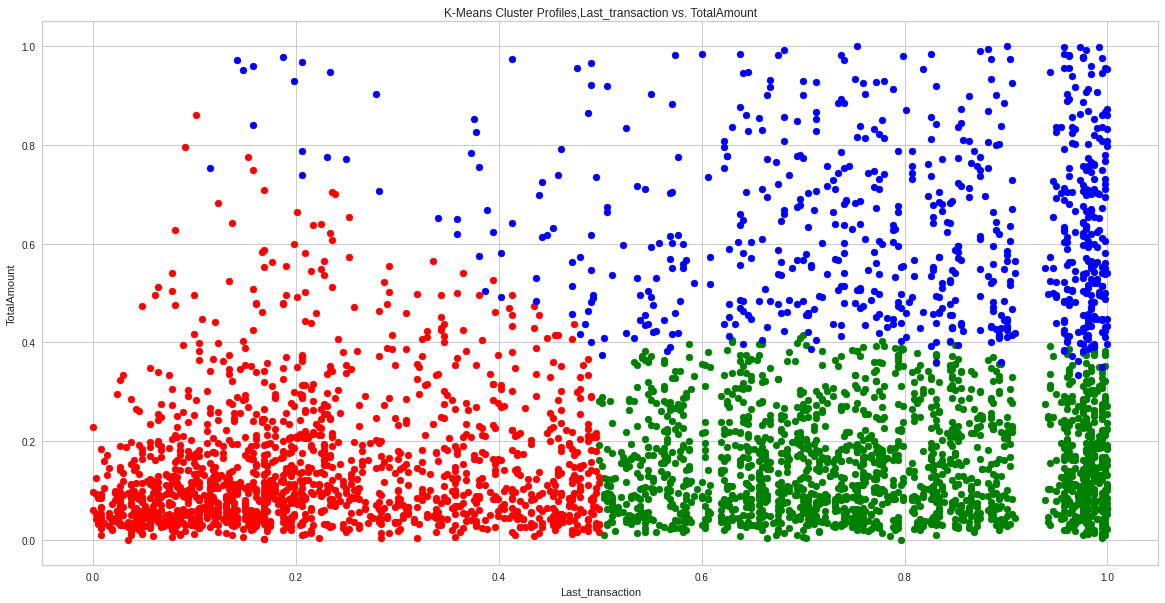

In [ ]:
#visualize using scalling data for 3 cluster
df1 = df_clustering[df_clustering.three_clusters==0]
df2 = df_clustering[df_clustering.three_clusters==1]
df3 = df_clustering[df_clustering.three_clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.scatter(df3.Last_transaction,df3['TotalAmount'],color='blue')
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

Text(0.5, 0.92, 'Gaussian Mixture Model')

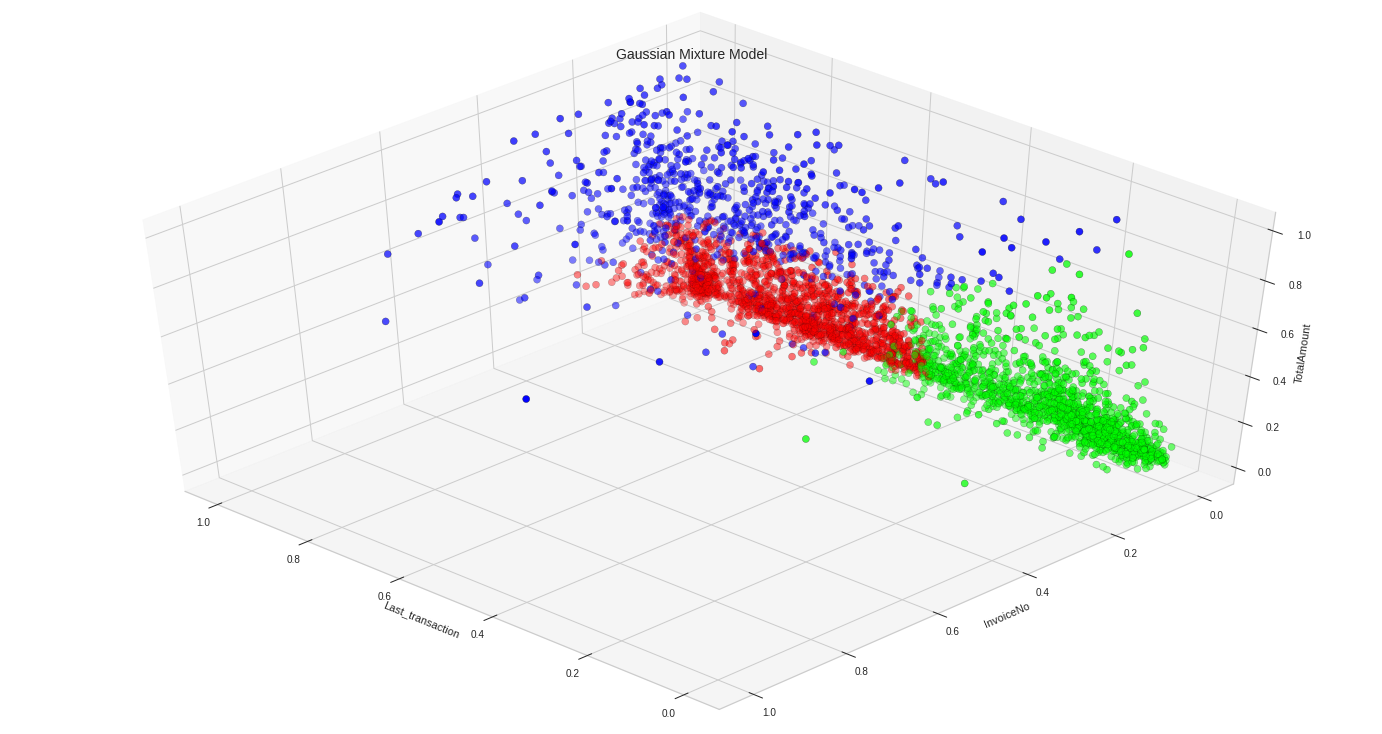

In [ ]:
#Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(df_clustering)
proba_lists = gmm.predict_proba(df_clustering)
#Plotting
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df_clustering['Last_transaction'], 
           df_clustering['InvoiceNo'], 
           df_clustering['TotalAmount'],
          c=colored_tuples, edgecolor="k", s=50)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("TotalAmount")
plt.title("Gaussian Mixture Model", fontsize=14)

clustering models were developed to explore customer behaviors in this sample using:

1. K-means Clusters: Elbow Method
2. K-means Clusters: Silhouette Method
3. Hierarchical Agglomerative Clustering

There is 3 clustering
1. customer spent up to $2500 per purchase and their lastest order is within 3 months

2. customer spent up to $1500 per purchase and their lastest order is between 3 months to 13 months

3. customer spent from $ 1500 to 3500 per purchase and their lastest order varies from 1.5 month to 13 months 